<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="200
" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [3]:
df = pd.read_csv("cardio.csv", sep=";")

In [4]:
df=df.sample(500, random_state=42)

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,66728,21770,1,156,64.0,140,80,2,1,0,0,1,1
48393,69098,21876,1,170,85.0,160,90,1,1,0,0,1,1
41416,59185,23270,1,151,90.0,130,80,1,1,0,0,1,1
34506,49288,19741,1,159,97.0,120,80,1,1,0,0,1,1
43725,62481,18395,1,164,68.0,120,80,1,1,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 46730 to 42173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    int64  
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 54.7 KB


In [7]:
df.shape

(500, 13)

In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,49656.324000,19460.940000,1.368000,164.746000,74.093400,127.91200,98.908000,1.338000,1.192000,0.07800,0.046000,0.762000,0.492000
std,27694.652229,2444.264657,0.482744,8.017609,14.340822,40.82349,130.985839,0.651617,0.540111,0.26844,0.209695,0.426286,0.500437
min,172.000000,14319.000000,1.000000,144.000000,43.000000,-120.00000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,26990.500000,17804.000000,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,49225.500000,19669.000000,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
75%,72126.500000,21326.250000,2.000000,170.000000,80.000000,140.00000,90.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
max,99934.000000,23670.000000,2.000000,198.000000,160.000000,907.00000,1200.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [10]:
df.loc[df['ap_hi'] < 0, 'ap_hi'] = df['ap_hi'].abs()
df.loc[df['ap_lo'] < 0, 'ap_lo'] = df['ap_lo'].abs()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

df[outliers] = np.nan
df.fillna(df.median(), inplace=True) 

## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [60]:
ap_hi_mean = df['ap_hi'].mean()
ap_hi_mean

122.59

⭐What is the standard deviation for Systolic blood pressure?

In [61]:
df['ap_hi'].std()

9.59301578773893

⭐What is the standard error of the mean for Systolic blood pressure?

In [62]:
sem = df.ap_hi.sem()

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [63]:
df.ap_hi.describe()

count    500.000000
mean     122.590000
std        9.593016
min       90.000000
25%      120.000000
50%      120.000000
75%      120.000000
max      170.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [64]:
moe = 1.645 * sem
upper_limit = ap_hi_mean + moe
lower_limit = ap_hi_mean - moe
print('90% Confidence Interval:',(lower_limit, upper_limit))

90% Confidence Interval: (121.88427409499084, 123.29572590500916)


In [65]:
moe = 1.96 * sem
upper_limit = ap_hi_mean + moe
lower_limit = ap_hi_mean - moe
print('95% Confidence Interval:',(lower_limit, upper_limit))

95% Confidence Interval: (121.74913509190398, 123.43086490809603)


In [66]:
moe = 2.58 * sem
upper_limit = ap_hi_mean + moe
lower_limit = ap_hi_mean - moe
print('99% Confidence Interval:',(lower_limit, upper_limit))

99% Confidence Interval: (121.48314721281238, 123.69685278718762)


## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [67]:
t_statistic, p_value = ttest_1samp(df['ap_hi'], ap_hi_mean)

In [68]:

print("One-sample t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Null hypothesis rejected: Population mean is not 122 mmHg.")
else:
    print("Null hypothesis cannot be rejected: Population mean is likely 122 mmHg.")
    

One-sample t-test results:
t-statistic: 0.0
p-value: 1.0
Null hypothesis cannot be rejected: Population mean is likely 122 mmHg.


## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [69]:
df.groupby('gender')['gender'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1.0,434.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2.0,66.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [96]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,52932.0,19671.0,1.0,165.0,70.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
48393,69098.0,21876.0,1.0,170.0,85.0,160.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
41416,59185.0,23270.0,1.0,151.0,90.0,130.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
34506,49288.0,19741.0,1.0,159.0,97.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
43725,62481.0,18395.0,1.0,164.0,68.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41292,52932.0,19671.0,1.0,165.0,70.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
47244,52932.0,19671.0,1.0,165.0,70.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
13797,52932.0,19671.0,1.0,165.0,70.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
15022,21476.0,22715.0,1.0,154.0,75.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [97]:
women = df[df['gender'] == 1.0]['id']
men = df[df['gender'] == 2.0]['id']

# Levene testi
statistic, p_value = levene(women, men)

# Test sonucunu yazdırma
print("Levene Test Statistics:", statistic)
print("p-value:", p_value)

Levene Test Statistics: 57.90843348039836
p-value: 1.384707285511906e-13


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [104]:
t_statistic, p_value = stats.ttest_ind(women, men, equal_var = False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("p-value > 0.05 olduğu için H0 hipotezi reddedilemez. Yani, iki grup arasındaki ortalama değerler eşittir.")
else:
    print("p-value <= 0.05 olduğu için H0 hipotezi reddedilir. Yani, iki grup arasındaki ortalama değerler eşit değildir.")

t-statistic: 1.5969806827536903
p-value: 0.11464730260992131
p-value > 0.05 olduğu için H0 hipotezi reddedilemez. Yani, iki grup arasındaki ortalama değerler eşittir.


## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

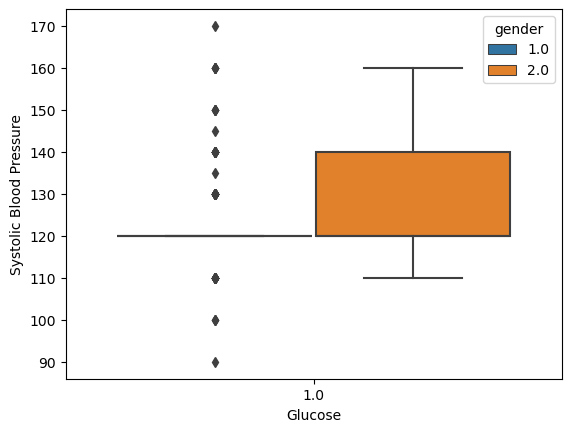

In [107]:
sns.boxplot(x='gluc', y='ap_hi', hue='gender', data=df)
plt.xlabel('Glucose')
plt.ylabel('Systolic Blood Pressure');

⭐Show the descriptive statistics of 3 groups.

In [110]:
df.groupby(['gender', 'ap_hi', 'gluc']).describe()

id                                                 \
                   count          mean           std      min       25%   
gender ap_hi gluc                                                         
1.0    90.0  1.0     1.0  44803.000000           NaN  44803.0  44803.00   
       100.0 1.0     3.0  63678.666667  24155.652637  36733.0  53822.00   
       110.0 1.0    22.0  53172.772727  25855.030127  14167.0  26764.50   
       120.0 1.0   354.0  52688.887006  11773.234854    173.0  52932.00   
       130.0 1.0    25.0  56711.240000  30629.097026   5352.0  30605.00   
       135.0 1.0     1.0  63353.000000           NaN  63353.0  63353.00   
       140.0 1.0    15.0  55863.133333  29553.635783   5844.0  32639.00   
       145.0 1.0     1.0  31210.000000           NaN  31210.0  31210.00   
       150.0 1.0     5.0  54602.800000  39858.152462   7296.0  17252.00   
       160.0 1.0     6.0  52911.000000  26979.585349   8805.0  39174.75   
       170.0 1.0     1.0  92154.000000           NaN  92154.0  92154.00   
2.0    110.0 1.0     7.0  48296.142857  24970.773299  18597.0  32097.50   
       115.0 1.0     1.0  72167.000000           NaN  72167.0  72167.00   
       120.0 1.0    30.0  50867.733333  27606.633991   4626.0  29840.75   
       130.0 1.0     8.0  48549.500000  17133.098177  18099.0  43306.75   
       140.0 1.0     8.0  36785.250000  29743.728807   2623.0  20018.50   
       150.0 1.0     7.0  50149.857143  28484.772478   5322.0  37080.00   
       160.0 1.0     5.0  35798.200000  40644.752843   4706.0   8117.00   

                                                 age                ...  \
                       50%       75%      max  count          mean  ...   
gender ap_hi gluc                                                   ...   
1.0    90.0  1.0   44803.0  44803.00  44803.0    1.0  15812.000000  ...   
       100.0 1.0   70911.0  77151.50  83392.0    3.0  19360.333333  ...   
       110.0 1.0   60884.0  68825.25  99934.0   22.0  18709.545455  ...   
       120.0 1.0   52932.0  52932.00  98687.0  354.0  19612.192090  ...   
       130.0 1.0   60975.0  83002.00  97459.0   25.0  20440.720000  ...   
       135.0 1.0   63353.0  63353.00  63353.0    1.0  18709.000000  ...   
       140.0 1.0   67184.0  79285.50  96889.0   15.0  20213.000000  ...   
       145.0 1.0   31210.0  31210.00  31210.0    1.0  20129.000000  ...   
       150.0 1.0   69205.0  84407.00  94854.0    5.0  18431.600000  ...   
       160.0 1.0   68017.0  68940.50  73818.0    6.0  20129.000000  ...   
       170.0 1.0   92154.0  92154.00  92154.0    1.0  15967.000000  ...   
2.0    110.0 1.0   44826.0  62190.50  86074.0    7.0  17251.142857  ...   
       115.0 1.0   72167.0  72167.00  72167.0    1.0  18319.000000  ...   
       120.0 1.0   50977.5  68788.50  96165.0   30.0  19139.900000  ...   
       130.0 1.0   45966.0  54482.25  76711.0    8.0  20209.625000  ...   
       140.0 1.0   29399.5  49047.00  91352.0    8.0  20042.750000  ...   
       150.0 1.0   57353.0  62774.50  88665.0    7.0  19839.142857  ...   
       160.0 1.0   10588.0  58911.00  96669.0    5.0  21870.600000  ...   

                  active      cardio                                           \
                     75%  max  count      mean       std  min   25%  50%  75%   
gender ap_hi gluc                                                               
1.0    90.0  1.0     1.0  1.0    1.0  0.000000       NaN  0.0  0.00  0.0  0.0   
       100.0 1.0     1.0  1.0    3.0  0.000000  0.000000  0.0  0.00  0.0  0.0   
       110.0 1.0     1.0  1.0   22.0  0.045455  0.213201  0.0  0.00  0.0  0.0   
       120.0 1.0     1.0  1.0  354.0  0.067797  0.251752  0.0  0.00  0.0  0.0   
       130.0 1.0     1.0  1.0   25.0  0.600000  0.500000  0.0  0.00  1.0  1.0   
       135.0 1.0     1.0  1.0    1.0  0.000000       NaN  0.0  0.00  0.0  0.0   
       140.0 1.0     1.0  1.0   15.0  0.800000  0.414039  0.0  1.00  1.0  1.0   
       145.0 1.0     1.0  1.0    1.0  1.000000       NaN  1.

⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.